# **Solar Data Discovery** 

## **Sierraleone Data Profiling, Cleaning, and EDA**

In [1]:
# Import Required Libraries   
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from scipy.stats import zscore
import seaborn as sns

In [17]:
# Reading DataSets 
sierraleone_data = pd.read_csv("../data/sierraleone-bumbuna.csv", parse_dates=['Timestamp'])

### Data Profiling

In [3]:
# display the first 10 records
sierraleone_data.head(10)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
5,2021-10-30 00:06:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.7,NaN
6,2021-10-30 00:07:00,-0.7,0.0,-0.8,0.0,0.0,22.0,99.4,0.1,0.7,0.2,240.4,0.0,1002,0,0.0,22.3,22.7,NaN
7,2021-10-30 00:08:00,-0.7,0.0,-0.8,0.0,0.0,22.0,99.5,0.2,0.7,0.4,233.5,1.6,1002,0,0.0,22.4,22.7,NaN
8,2021-10-30 00:09:00,-0.7,-0.1,-0.8,0.0,0.0,22.0,99.5,0.7,1.1,0.5,232.0,0.3,1002,0,0.0,22.4,22.7,NaN
9,2021-10-30 00:10:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.6,1.1,0.5,232.5,0.3,1002,0,0.0,22.4,22.7,NaN


In [4]:
# display the last 10 records 
sierraleone_data.tail(10)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
525590,2022-10-29 23:51:00,-1.2,-0.1,-2.3,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.3,24.6,NaN
525591,2022-10-29 23:52:00,-1.2,-0.1,-2.3,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.3,24.6,NaN
525592,2022-10-29 23:53:00,-1.3,-0.1,-2.4,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.3,24.6,NaN
525593,2022-10-29 23:54:00,-1.4,-0.1,-2.5,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.2,24.6,NaN
525594,2022-10-29 23:55:00,-1.5,-0.1,-2.7,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.2,24.5,NaN
525595,2022-10-29 23:56:00,-1.6,-0.1,-2.9,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525596,2022-10-29 23:57:00,-1.7,-0.1,-3.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525597,2022-10-29 23:58:00,-1.7,-0.1,-3.1,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN
525598,2022-10-29 23:59:00,-1.7,-0.2,-3.3,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN
525599,2022-10-30 00:00:00,-1.7,-0.1,-3.4,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN


In [5]:
# display the shape of the data to get info about number features and instance 
print(f"Togo Solar data Information: ")
print(f"Instances: {sierraleone_data.shape[0]} records ") # To display number of records 
print(f"Features:  {sierraleone_data.shape[1] } columns")

Togo Solar data Information: 
Instances: 525600 records 
Features:  19 columns


In [6]:
# Dataset information about type of each columns, size 
sierraleone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

In [18]:
# Getting number of unique values 
number_of_unique = pd.DataFrame({
    'columns': sierraleone_data.columns,
    '# of unique': sierraleone_data.nunique()
})
number_of_unique

,columns,# of unique
Timestamp,Timestamp,525600
GHI,GHI,8742
DNI,DNI,8205
DHI,DHI,7183
ModA,ModA,10188
ModB,ModB,8524
Tamb,Tamb,276
RH,RH,902
WS,WS,145
WSgust,WSgust,88


In [8]:
# getting number of missing values for all dataset
print("="*100)
print("Missing Values Detection ".center(150))
print("="*100, end="\n")
print(f"Total number of missing values in the Dataset: {sierraleone_data.isna().sum().sum()}")
print("="*100, end="\n")

# columns having missing values more than 5%

print(f"A Dataset Feature Having missing values more than 5 %".center(150))
print("="*100)
for col in sierraleone_data.columns: #
    percent =(sierraleone_data[col].isna().sum()/sierraleone_data.shape[0]) * 100
    if  percent.round(2) >= 5:
        print(f"Missing Values of column {col}: -> {percent} %")
print("="*100,end="\n")


                                                              Missing Values Detection                                                                
Total number of missing values in the Dataset: 525600
                                                A Dataset Feature Having missing values more than 5 %                                                 
Missing Values of column Comments: -> 100.0 %


In [19]:
# Feature contain missing values contain missing values more than 5% 
no_missing = pd.DataFrame({
    '# missing': sierraleone_data.isna().sum(), 
    '% missing': sierraleone_data.isna().mean() * 100
})

# Filter for columns with more than 5% missing values
no_missing_over_5 = no_missing[no_missing['% missing'] > 5]

no_missing_over_5

,# missing,% missing
Comments,525600,100.0


In [20]:
# After getting number of missing values feature "comment" is dropped 
sierraleone_data.drop(['Comments'], axis=1, inplace=True)  # drop comments column

In [21]:

# Number of Duplicated values 
print("="*100)
print("Duplicated Values".center(160))
print("="*100)
print(f"Number of Duplicated values in the dataset: {sierraleone_data.duplicated().sum()}".center(150)) # used to display the number of duplicated values in the dataset
print("="*100, end="\n")

                                                                       Duplicated Values                                                                        


                                                    Number of Duplicated values in the dataset: 0                                                     


In [22]:
# finding incorrect entries from the dataset     
negative_values = pd.DataFrame({
    'num of -ve values': sierraleone_data.select_dtypes(include='number').lt(0).sum(), # counting the number of negative values in the dataset
    "% of -ve values": round(sierraleone_data.select_dtypes(include='number').lt(0).mean() *100, 2), # percentage of negative values
})

negative_values_0 = negative_values[negative_values['num of -ve values'] > 0]
negative_values_0

,num of -ve values,% of -ve values
GHI,261135,49.68
DNI,266352,50.68
DHI,263128,50.06


In [24]:
# This line code is used to clean negative values 
negative_cols = ['GHI', 'DNI', 'DHI', ] # List of columns to replace negative values with 0
sierraleone_data[negative_cols] = sierraleone_data[negative_cols].clip(lower=0) # Replace negative values with 0

In [25]:
# selected columns 
radiation_cols = ['GHI', 'DNI', 'DHI', 'ModA','ModB','WS', 'WSgust']

In [26]:
# checking statistical summary of the dataset for numerical features 
sierraleone_data.describe(include = [np.number])

# This Statistical description is done after clipping negative values of GHI, DNI, and DHI 

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,204.406778,116.523731,116.273677,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091
std,296.787520,218.573992,157.020868,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161
min,0.000000,0.000000,0.000000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000
50%,0.300000,0.000000,0.000000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000


### Data Profiling Description

- The dataset contains 525,600 records and 19 columns, including timestamp, solar radiation measurements, temperature, humidity, wind, and other meteorological variables.
- All columns except "Comments" have complete data with no missing values. The "Comments" column is entirely missing (100% missing values).
- The columns "GHI", "DNI", and "DHI" (solar radiation measurements) initially contained a significant proportion of negative values (about 49-50%), which are physically implausible and were later clipped to zero.
- There are no duplicated records in the dataset.
- The dataset includes 16 float columns, 2 integer columns, and 1 datetime column.
- The number of unique values varies widely across columns, with "Timestamp" having 525,600 unique entries (one per record), and some columns (like "Cleaning") having only 2 unique values.
- The dataset is suitable for time series analysis, outlier detection, and further exploratory data analysis after handling missing and incorrect values.

#### Statistical Summary of `Sierraleone_data`

- **Count**: All numerical columns have 525,600 non-missing values, indicating no missing data after cleaning (except for the dropped "Comments" column).
- **Mean & Std**: 
    - Solar radiation variables (`GHI`, `DNI`, `DHI`) have low mean values, reflecting the prevalence of nighttime or low-irradiance periods.
    - Temperature variables (`Tamb`, `TModA`, `TModB`) show realistic average values for the region, with moderate standard deviations.
    - Wind speed (`WS`, `WSgust`) and direction (`WD`) have low means and moderate variability.
    - Relative humidity (`RH`) has a high mean, indicating generally humid conditions.
- **Min & Max**: 
    - All negative values in `GHI`, `DNI`, and `DHI` have been clipped to zero, so their minimum is 0.
    - Maximum values for solar radiation and temperature columns are within expected physical ranges.
- **Quartiles**: 
    - The 25th, 50th (median), and 75th percentiles for each variable provide insight into the distribution and skewness of the data.
    - Many variables (e.g., `GHI`, `DNI`, `DHI`) have a median of 0, confirming a large proportion of zero or low values (nighttime or cloudy periods).


In [27]:
# checking for outliers using zscore
def z_score_outlier(col):
    outlier = {}
    for co in col:    
            zscore1 = np.abs(zscore(sierraleone_data[co]))
            outlier[co]= zscore1 > 3 
    return outlier
outlier_z_score = z_score_outlier(radiation_cols)

# Displaying number of outlier for each columns 
z_score_Outlier = pd.DataFrame({
    'column': radiation_cols,
    '# of outlier': [outlier.sum() for outlier in outlier_z_score.values()],
    '% of Outlier':[round(outlier.mean() * 100, 2) for outlier in outlier_z_score.values()]
})
z_score_Outlier

,column,# of outlier,% of Outlier
0,GHI,2574,0.49
1,DNI,7594,1.44
2,DHI,3202,0.61
3,ModA,1604,0.31
4,ModB,2041,0.39
5,WS,3967,0.75
6,WSgust,3665,0.70


In [28]:
#Calculate the z-scores for the radiation columns
z_scores = np.abs(zscore(sierraleone_data[radiation_cols], nan_policy='omit'))

#Create a boolean mask where any z-score > 3 is True (outlier)
outlier = (z_scores > 3).any(axis=1)

# Drop those rows from the original dataset
benin_data_cleaned = sierraleone_data[~outlier].copy()

In [29]:
# save cleaned data 
benin_data_cleaned.to_csv('../data/sierraleone_clean.csv', index=False)

Time series analysis 

In [30]:
# Reading cleaned sierraleone data
sierraleone_cleaned = pd.read_csv('../data/benin_clean.csv', parse_dates=['Timestamp'])

In [31]:
sierraleone_cleaned["Year"] = sierraleone_cleaned['Timestamp'].dt.year
sierraleone_cleaned["month"] = sierraleone_cleaned['Timestamp'].dt.month
sierraleone_cleaned["day"] = sierraleone_cleaned['Timestamp'].dt.day
sierraleone_cleaned["Hour"] = sierraleone_cleaned['Timestamp'].dt.hour
sierraleone_cleaned["minute"] = sierraleone_cleaned['Timestamp'].dt.minute

In [ ]:
# display years of the dataset
sierraleone_cleaned['Year'].unique() # used to display unique year values 

array([2021, 2022], dtype=int32)

C:\Users\jonep\AppData\Local\Temp\ipykernel_4996\624111953.py:12: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\jonep\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


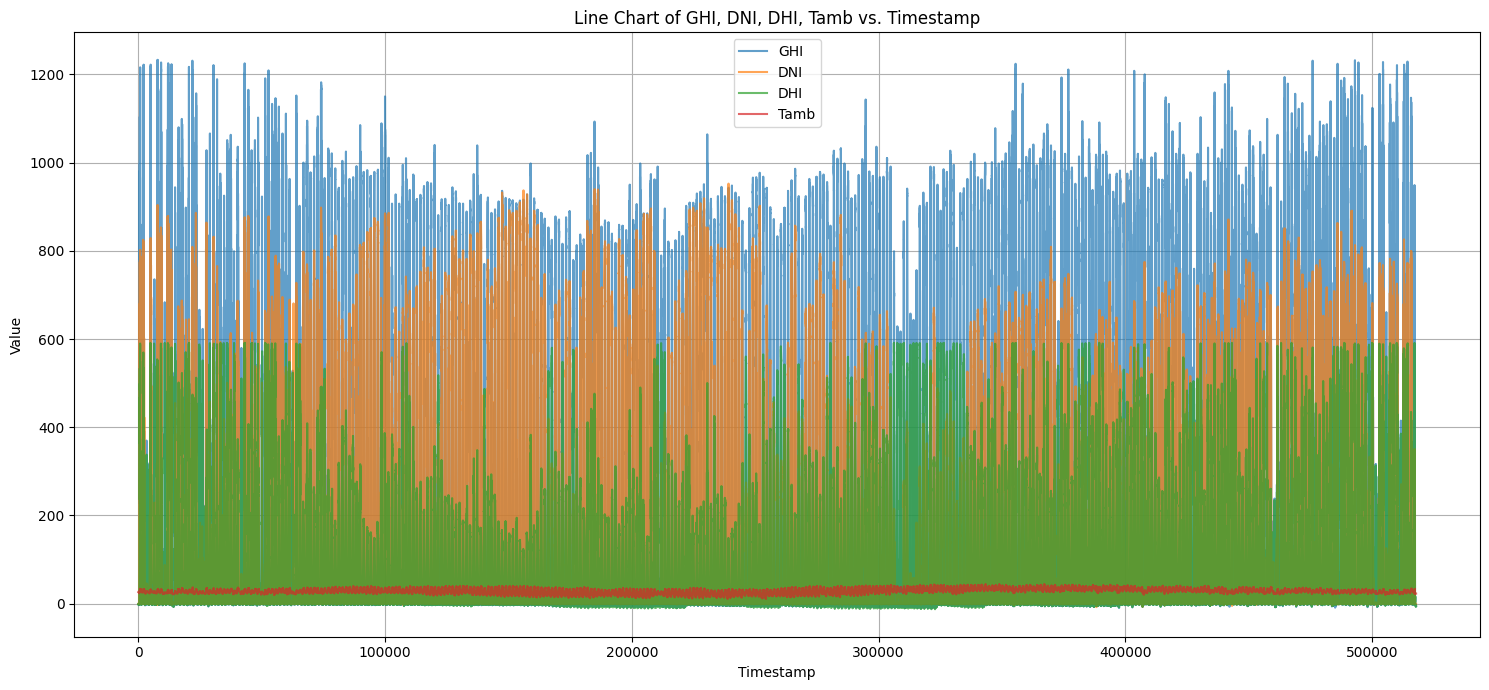

In [33]:
# Line or bar charts of GHI, DNI, DHI, Tamb vs. Timestamp.
plt.figure(figsize=(15, 7))
plt.plot(sierraleone_cleaned.index, sierraleone_cleaned['GHI'], label='GHI', alpha=0.7)
plt.plot(sierraleone_cleaned.index, sierraleone_cleaned['DNI'], label='DNI', alpha=0.7)
plt.plot(sierraleone_cleaned.index, sierraleone_cleaned['DHI'], label='DHI', alpha=0.7)
plt.plot(sierraleone_cleaned.index, sierraleone_cleaned['Tamb'], label='Tamb', alpha=0.7)
plt.title('Line Chart of GHI, DNI, DHI, Tamb vs. Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

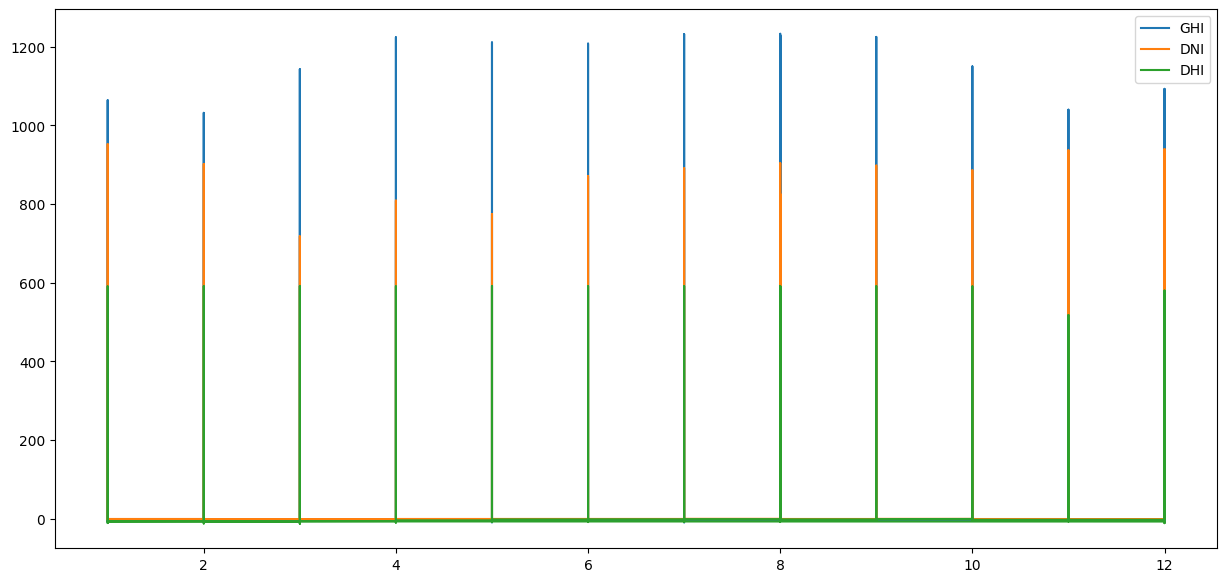

In [34]:
# Observe patterns by month, trends throughout day, or anomalies, such as peaks in solar irradiance or temperature fluctuations. 
plt.figure(figsize=(15, 7))
plt.plot(sierraleone_cleaned['month'], sierraleone_cleaned['GHI'], label='GHI')
plt.plot(sierraleone_cleaned['month'], sierraleone_cleaned['DNI'], label='DNI')
plt.plot(sierraleone_cleaned['month'], sierraleone_cleaned['DHI'], label='DHI')
plt.legend()
plt.show()

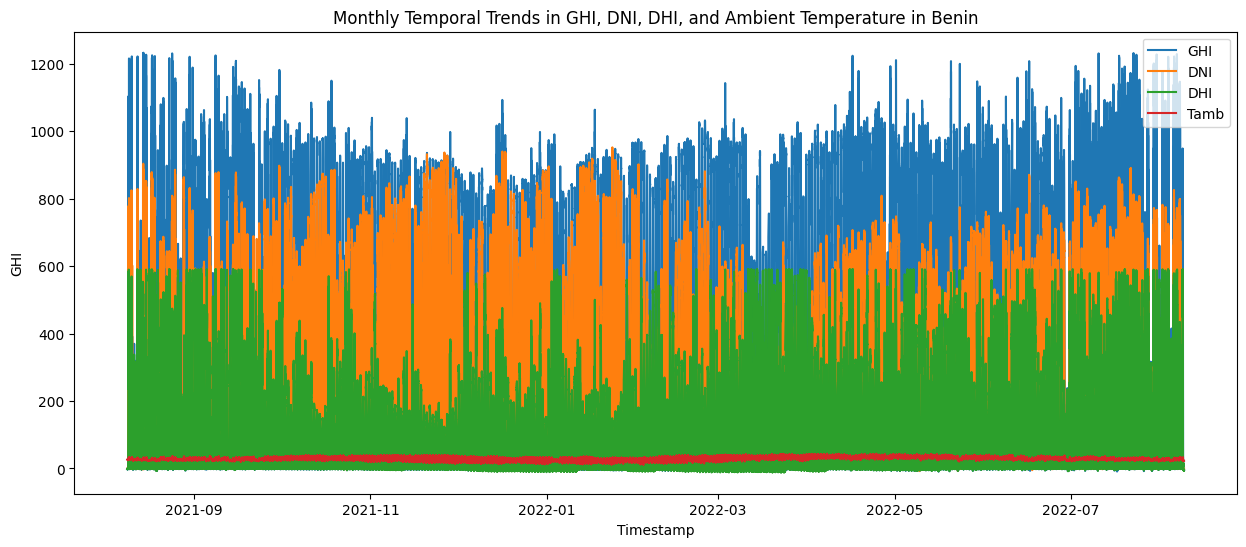

In [35]:
# Observe patterns by month, trends throughout day, or anomalies, such as peaks in solar irradiance or temperature fluctuations. 
plt.figure(figsize=(15,6))
sns.lineplot(data=sierraleone_cleaned, y='GHI', x = 'Timestamp', label = 'GHI')
sns.lineplot(data=sierraleone_cleaned, y='DNI', x = 'Timestamp', label = "DNI")
sns.lineplot(data=sierraleone_cleaned, y='DHI', x = 'Timestamp', label = "DHI")
sns.lineplot(data=sierraleone_cleaned, y='Tamb', x = 'Timestamp', label = "Tamb")

plt.legend(loc = "upper right")
plt.title("Monthly Temporal Trends in GHI, DNI, DHI, and Ambient Temperature in Benin")
plt.show()

Group by Cleaning flag and plot average ModA & ModB pre/post-clean.

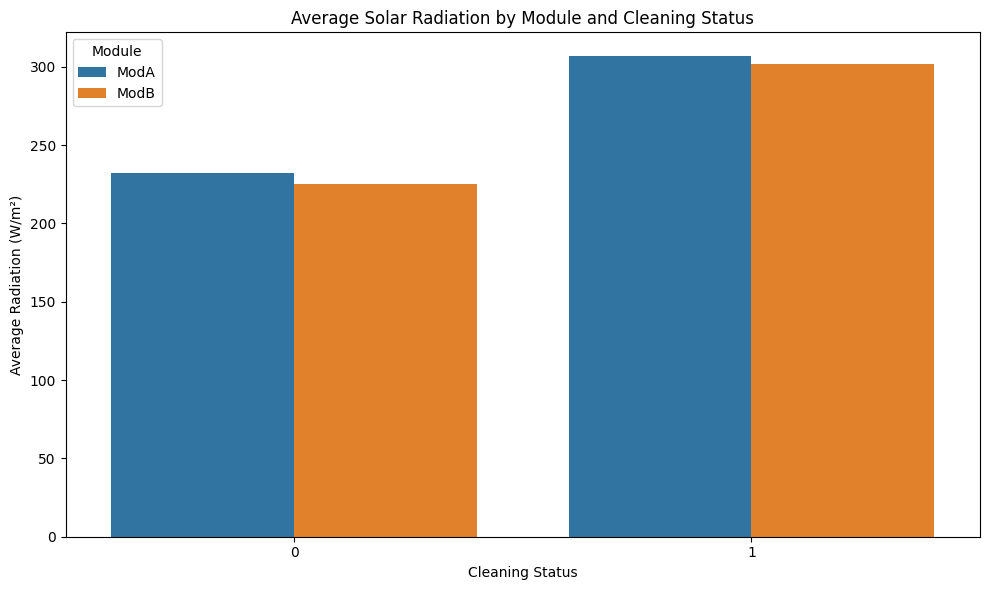

In [ ]:
# group 
# Calculate average values by Cleaning Flag
average_values = sierraleone_cleaned.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()

# Melt the dataframe for easier plotting
avg_values_melted = average_values.melt(id_vars='Cleaning', 
                                   value_vars=['ModA', 'ModB'],
                                   var_name='Module', 
                                   value_name='Average_Radiation')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Cleaning', y='Average_Radiation', hue='Module', data=avg_values_melted)
plt.title('Average Solar Radiation by Module and Cleaning Status')
plt.ylabel('Average Radiation (W/m²)')
plt.xlabel('Cleaning Status')
plt.legend(title='Module')
plt.tight_layout()
plt.show()

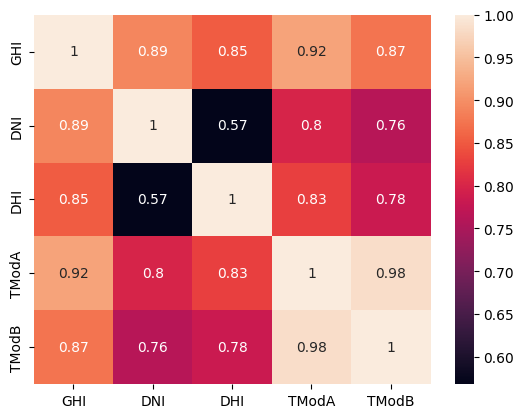

In [37]:
# Correlation & Relationship Analysis
# Heatmap of correlations (GHI, DNI, DHI, TModA, TModB).
corr = sierraleone_cleaned[["GHI", "DNI", "DHI", "TModA", "TModB"]].corr()
sns.heatmap(corr, annot=True)
plt.show()

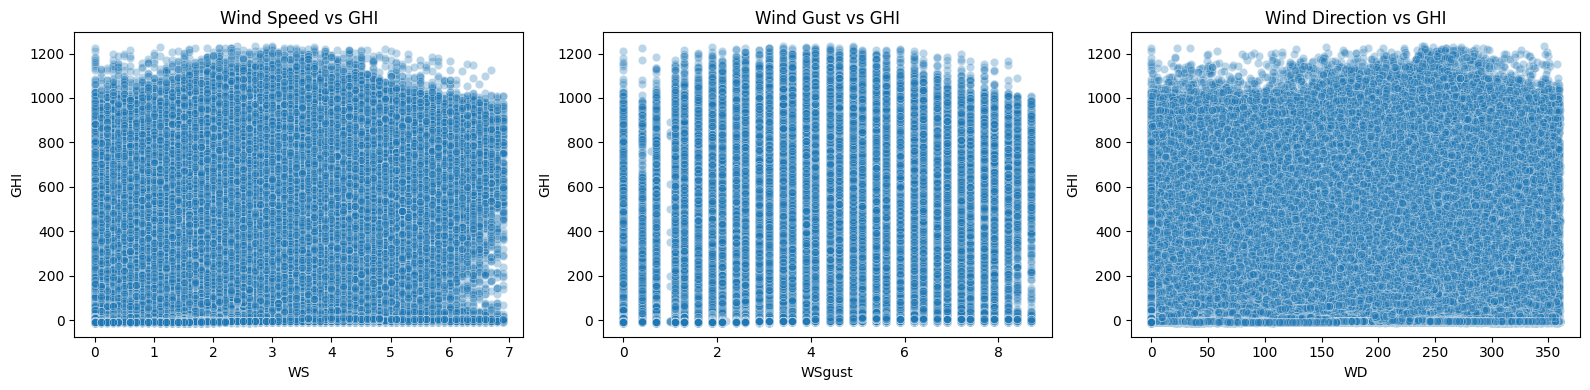

In [38]:
# Scatter plots: WS, WSgust, WD vs. GHI; RH vs. Tamb or RH vs. GHI
plt.figure(figsize=(16, 4))

# WS vs GHI
plt.subplot(1, 3, 1)
sns.scatterplot(data=sierraleone_cleaned, x='WS', y='GHI', alpha=0.3)
plt.title('Wind Speed vs GHI')

# WSgust vs GHI
plt.subplot(1, 3, 2)
sns.scatterplot(data=sierraleone_cleaned, x='WSgust', y='GHI', alpha=0.3)
plt.title('Wind Gust vs GHI')

# WD vs GHI
plt.subplot(1, 3, 3)
sns.scatterplot(data=sierraleone_cleaned, x='WD', y='GHI', alpha=0.3)
plt.title('Wind Direction vs GHI')

plt.tight_layout()
plt.show()

Wind & Distribution Analysis

In [39]:
#Wind rose or radial bar plot of WS/WD.
from windrose import WindroseAxes

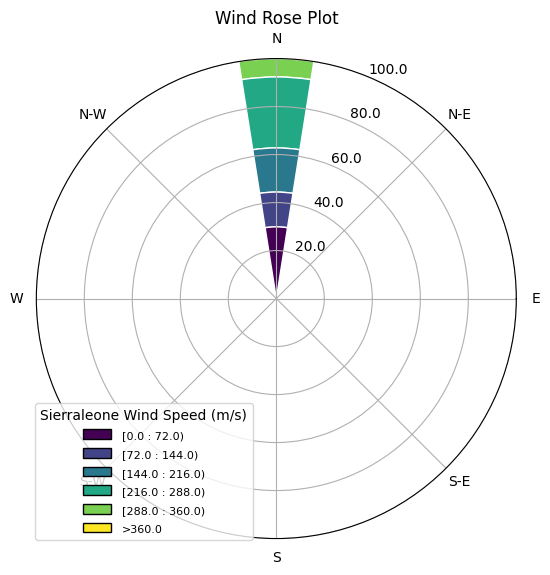

In [40]:
# Create windrose plot
fig = plt.figure(figsize=(8, 6))
ax = WindroseAxes.from_ax(fig=fig)
ax.bar(sierraleone_cleaned['WS'], sierraleone_cleaned["WD"], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(title="Sierraleone Wind Speed (m/s)")
plt.title("Wind Rose Plot")
plt.show()

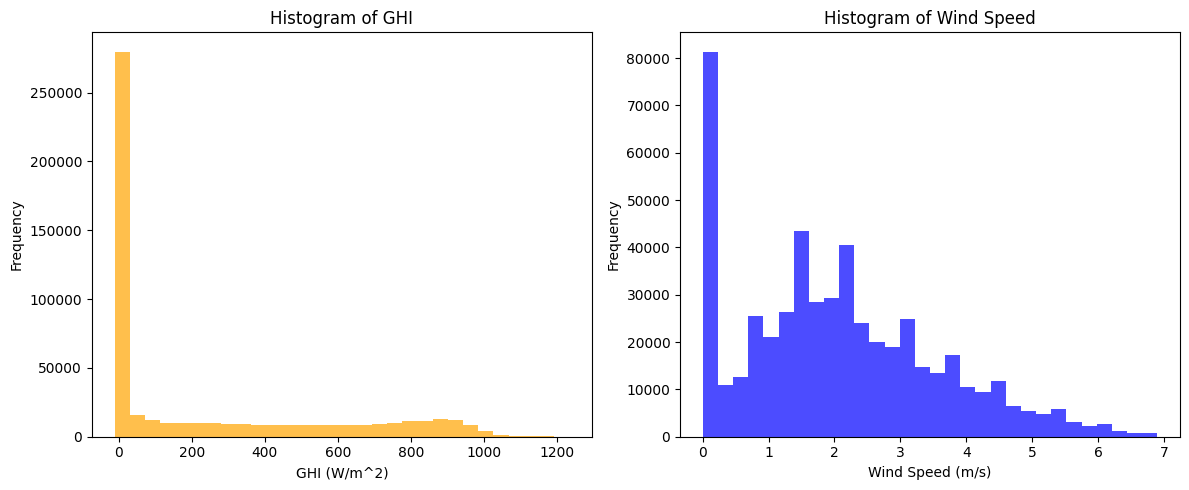

In [41]:
# Histograms for GHI and one other variable (e.g. WS).
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for GHI
axs[0].hist(sierraleone_cleaned['GHI'], bins=30, color='orange', alpha=0.7)
axs[0].set_title('Histogram of GHI')
axs[0].set_xlabel('GHI (W/m^2)')
axs[0].set_ylabel('Frequency')

# Histogram for WS
axs[1].hist(sierraleone_cleaned['WS'], bins=30, color='blue', alpha=0.7)
axs[1].set_title('Histogram of Wind Speed')
axs[1].set_xlabel('Wind Speed (m/s)')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Temperature Analysis


In [42]:
# Calculate correlation coefficients
correlation_temp = sierraleone_cleaned['RH'].corr(sierraleone_cleaned['Tamb'])
correlation_solar = sierraleone_cleaned['RH'].corr(sierraleone_cleaned['GHI'])

print(f'Correlation between RH and Temperature: {correlation_temp:.2f}')
print(f'Correlation between RH and Solar Radiation: {correlation_solar:.2f}')

Correlation between RH and Temperature: -0.41
Correlation between RH and Solar Radiation: -0.35


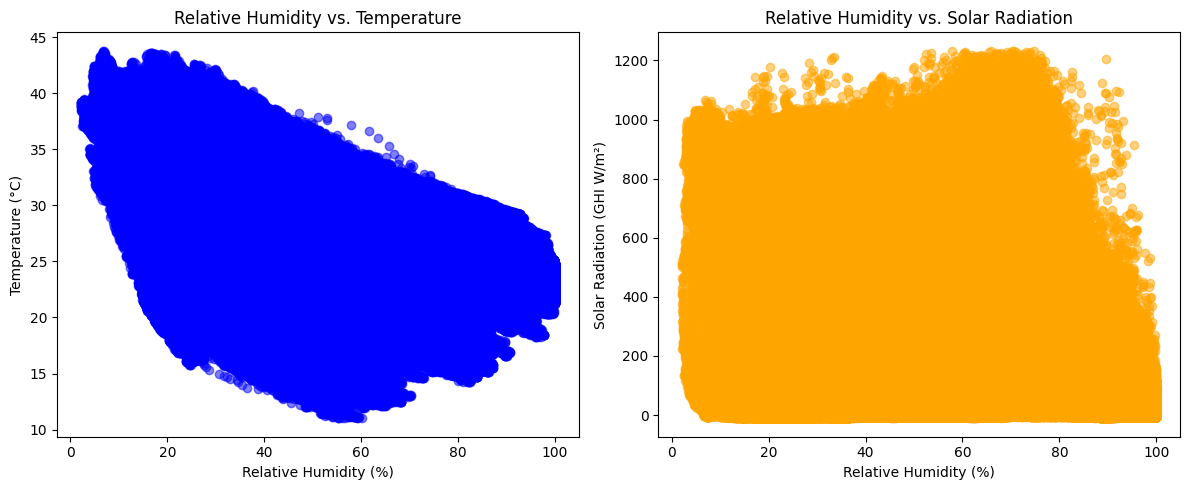

In [44]:
# Set the figure size
plt.figure(figsize=(12, 5))

# Scatter plot for RH vs. Temperature
plt.subplot(1, 2, 1)
plt.scatter(sierraleone_cleaned['RH'], sierraleone_cleaned['Tamb'], alpha=0.5, color='blue')
plt.title('Relative Humidity vs. Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
# Scatter plot for RH vs. GHI
plt.subplot(1, 2, 2)
plt.scatter(sierraleone_cleaned['RH'], sierraleone_cleaned['GHI'], alpha=0.5, color='orange')
plt.title('Relative Humidity vs. Solar Radiation')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Solar Radiation (GHI W/m²)')

plt.tight_layout()
plt.show()

Bubble Chart
- GHI vs. Tamb with bubble size = RH or BP.

C:\Users\jonep\AppData\Local\Temp\ipykernel_4996\1717236794.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(sierraleone_cleaned['GHI'], sierraleone_cleaned['Tamb'], s=bubble_sizes,


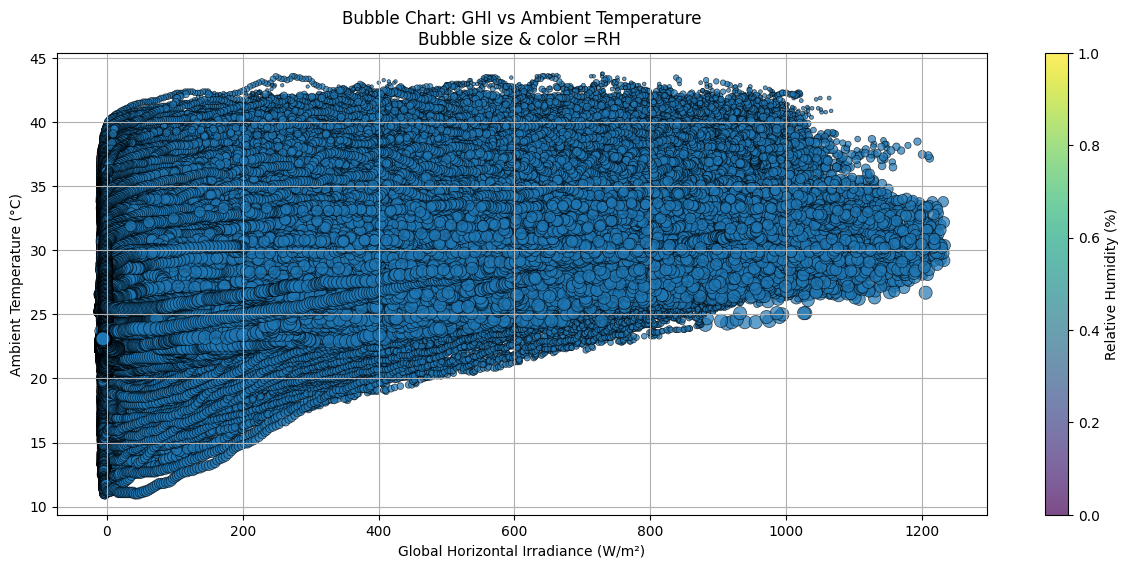

In [45]:
# Scale bubble sizes (adjust the multiplier for better visualization)
bubble_sizes = sierraleone_cleaned['RH']

plt.figure(figsize=(15, 6))
scatter = plt.scatter(sierraleone_cleaned['GHI'], sierraleone_cleaned['Tamb'], s=bubble_sizes, 
                      cmap='coolwarm', alpha=0.7, edgecolors='k', linewidth=0.5)

plt.colorbar(scatter, label='Relative Humidity (%)')
plt.xlabel('Global Horizontal Irradiance (W/m²)')
plt.ylabel('Ambient Temperature (°C)')
plt.title('Bubble Chart: GHI vs Ambient Temperature\nBubble size & color =RH ')
plt.grid(True)
plt.show()